# Ask Question

Can we predict the maximum temperature tomorrow for Seattle, Washington given one year of historical data? 

The data we have available is the maximum temperatures in Seattle from the National Oceanic and Atmospheric Administration's (NOAA) [Climate Data Online Tool](https://www.ncdc.noaa.gov/cdo-web/).

# Data Acqusition

In [166]:
# Pandas is used for data manipulation
import pandas as pd
from matplotlib import pyplot as plt

# Read in data as pandas dataframe and display first 5 rows

features_train = pd.read_csv('data/train.csv')
features_val = pd.read_csv('data/val.csv')
#features = pd.concat([data_train, data_val])


from sklearn.preprocessing import LabelEncoder



# Identify Anomalies

In [167]:
print('The shape of our features is:', features_train.shape)
print('The shape of our features is:', features_val.shape)


The shape of our features is: (168508, 7)
The shape of our features is: (40229, 7)


In [168]:
# Descriptive statistics for each column
features_train.describe()

,DIA,MES,ANIO,CLUSTER,ESPECIAL,SEMANA
count,168508.000000,168508.000000,168508.000000,168508.000000,168508.000000,168508.000000
mean,15.723467,6.588542,2015.511074,0.847265,0.029631,105.009157
std,8.759809,3.398587,1.116261,0.963954,0.169567,60.160867
min,1.000000,1.000000,2014.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,2015.000000,0.000000,0.000000,53.000000
50%,16.000000,7.000000,2016.000000,0.000000,0.000000,106.000000
75%,23.000000,10.000000,2017.000000,2.000000,0.000000,157.000000
max,31.000000,12.000000,2017.000000,2.000000,1.000000,208.000000


In [169]:
""""
# Use datetime for dealing with dates
import datetime

# Get years, months, and days
years = features['ANIO']
months = features['MES']
days = features['DIA']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
"""

'"\n# Use datetime for dealing with dates\nimport datetime\n\n# Get years, months, and days\nyears = features[\'ANIO\']\nmonths = features[\'MES\']\ndays = features[\'DIA\']\n\n# List and then convert to datetime object\ndates = [str(int(year)) + \'-\' + str(int(month)) + \'-\' + str(int(day)) for year, month, day in zip(years, months, days)]\ndates = [datetime.datetime.strptime(date, \'%Y-%m-%d\') for date in dates]\n'

In [170]:
"""
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')
"""

"\n# Import matplotlib for plotting and use magic command for Jupyter Notebooks\nimport matplotlib.pyplot as plt\n\n%matplotlib inline\n\n# Set the style\nplt.style.use('fivethirtyeight')\n"

In [171]:
"""
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)
"""

"\n# Set up the plotting layout\nfig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))\nfig.autofmt_xdate(rotation = 45)\n\n# Actual max temperature measurement\nax1.plot(dates, features['actual'])\nax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')\n\n# Temperature from 1 day ago\nax2.plot(dates, features['temp_1'])\nax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')\n\n# Temperature from 2 days ago\nax3.plot(dates, features['temp_2'])\nax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')\n\n# Friend Estimate\nax4.plot(dates, features['friend'])\nax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')\n\nplt.tight_layout(pad=2)\n"

# Data Preparation

### One-Hot Encoding

One hot encoding takes this:

| week |
|------|
| Mon  |
| Tue  |
| Wed  |
| Thu  |
| Fri  |
| Sat  |
| Sun  |

and converts it into:

| Mon | Tue | Wed | Thu | Fri | Sat | Sun |
|-----|-----|-----|-----|-----|-----|-----|
| 1   | 0   | 0   | 0   | 0   |  0  |  0  |
| 0   | 1   | 0   | 0   | 0   |  0  |  0  |
| 0   | 0   | 1   | 0   | 0   |  0  |  0  |
| 0   | 0   | 0   | 1   | 0   |  0  |  0  |
| 0   | 0   | 0   | 0   | 1   |  0  |  0  |
| 0   | 0   | 0   | 0   | 0   |  1  |  0  |
| 0   | 0   | 0   | 0   | 0   |  0  |  1  |

In [172]:
features_train['DIA_SEMANA']=pd.to_datetime(features_train['ANIO']*10000+features_train['MES']*100+features_train['DIA'],format='%Y%m%d').dt.dayofweek
features_val['DIA_SEMANA']=pd.to_datetime(features_val['ANIO']*10000+features_val['MES']*100+features_val['DIA'],format='%Y%m%d').dt.dayofweek


features_train = pd.get_dummies(features_train)
features_train=features_train.groupby(['DIA_SEMANA','MES','ANIO','ESPECIAL','CLUSTER']).agg({'CLASE_atropello':'sum','CLASE_caida ocupante':'sum','CLASE_choque':'sum','CLASE_otro':'sum','CLASE_volcamiento':'sum'})
nombre_columnasTipo=['atropello', 'caidaocupante','choque','otro','volcamiento']
features_train.columns = nombre_columnasTipo
features_train = features_train.reset_index()

features_train.loc[features_train['CLUSTER'] == 0, 'CLUSTER'] = 'cluster0'
features_train.loc[features_train['CLUSTER'] == 1, 'CLUSTER'] = 'cluster1'
features_train.loc[features_train['CLUSTER'] == 2, 'CLUSTER'] = 'cluster2'

features_train = pd.get_dummies(features_train)


features_val = pd.get_dummies(features_val)
features_val=features_val.groupby(['DIA_SEMANA','MES','ANIO','ESPECIAL','CLUSTER']).agg({'CLASE_atropello':'sum','CLASE_caida ocupante':'sum','CLASE_choque':'sum','CLASE_otro':'sum','CLASE_volcamiento':'sum'})
nombre_columnasTipo=['atropello', 'caidaocupante','choque','otro','volcamiento']
features_val.columns = nombre_columnasTipo
features_val = features_val.reset_index()

features_val.loc[features_val['CLUSTER'] == 0, 'CLUSTER'] = 'cluster0'
features_val.loc[features_val['CLUSTER'] == 1, 'CLUSTER'] = 'cluster1'
features_val.loc[features_val['CLUSTER'] == 2, 'CLUSTER'] = 'cluster2'

features_val = pd.get_dummies(features_val)


In [173]:
features_val

,DIA_SEMANA,MES,ANIO,ESPECIAL,atropello,caidaocupante,choque,otro,volcamiento,CLUSTER_cluster0,CLUSTER_cluster1,CLUSTER_cluster2
0,0,1.0,2018.0,0.0,21,14,121,15,2,1,0,0
1,0,1.0,2018.0,0.0,1,1,11,0,0,0,1,0
2,0,1.0,2018.0,0.0,9,9,95,11,3,0,0,1
3,0,1.0,2018.0,1.0,7,10,38,14,1,1,0,0
4,0,1.0,2018.0,1.0,2,1,4,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
290,6,11.0,2018.0,0.0,3,2,9,2,0,0,1,0
291,6,11.0,2018.0,0.0,7,2,73,7,1,0,0,1
292,6,12.0,2018.0,0.0,35,22,170,25,6,1,0,0
293,6,12.0,2018.0,0.0,2,2,16,4,3,0,1,0


In [174]:

print('Shape of features after one-hot encoding:', features_val.shape)
print('Shape of train after one-hot encoding:', features_train.shape)


Shape of features after one-hot encoding: (295, 12)
Shape of train after one-hot encoding: (1183, 12)


### Features and Labels and Convert Data to Arrays

In [175]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict

label_train = np.array(features_train[['atropello', 'caidaocupante','choque','otro','volcamiento']])
label_val = np.array(features_val[['atropello', 'caidaocupante','choque','otro','volcamiento']])

# Remove the labels from the features
# axis 1 refers to the columns
features_train= features_train.drop(['atropello', 'caidaocupante','choque','otro','volcamiento'], axis = 1)
features_val= features_val.drop(['atropello', 'caidaocupante','choque','otro','volcamiento'], axis = 1)
feature_list = list(features_val.columns)

features_train= np.array(features_train)
features_val= np.array(features_val)





### Training and Testing Sets

In [176]:
print('Training Features Shape:', features_train.shape)
print('Training Labels Shape:', label_train.shape)
print('Testing Features Shape:', features_val.shape)
print('Testing Labels Shape:', label_val.shape)

Training Features Shape: (1183, 7)
Training Labels Shape: (1183, 5)
Testing Features Shape: (295, 7)
Testing Labels Shape: (295, 5)


# Establish Baseline

In [177]:
"""
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')
"""

"\n# The baseline predictions are the historical averages\nbaseline_preds = test_features[:, feature_list.index('average')]\n\n# Baseline errors, and display average baseline error\nbaseline_errors = abs(baseline_preds - test_labels)\nprint('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')\n"

# Train Model

In [178]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, min_samples_leaf=25, random_state=42)

# Train the model on training data
rf.fit(features_train,label_train);


# Make Predictions on Test Data

error validacion: 115.92239057938488 erro prueva 105.46147601640516


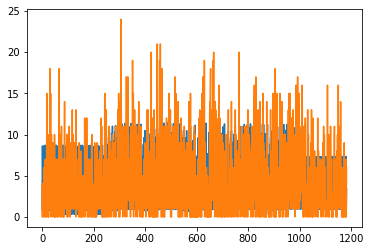

In [179]:
from sklearn.metrics import mean_squared_error as rmse
# Use the forest's predict method on the test data
prediccion_validacion = rf.predict(features_val)
prediccion_entrenamiento=rf.predict(features_train)
# Calculate the absolute errors
error=rmse(label_val, prediccion_validacion)
error2=rmse(label_train, prediccion_entrenamiento)

# Print out the mean absolute error (mae)
print('error validacion:', error,"erro prueva",error2)
#plt.plot(prediccion_validacion[80])
#plt.plot(test_labels[80])
plt.plot(prediccion_entrenamiento[:,4])

plt.plot(label_train[:,4])


In [180]:

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: CLUSTER_cluster1     Importance: 0.61
Variable: ESPECIAL             Importance: 0.27
Variable: DIA_SEMANA           Importance: 0.08
Variable: CLUSTER_cluster0     Importance: 0.02
Variable: CLUSTER_cluster2     Importance: 0.02
Variable: MES                  Importance: 0.0
Variable: ANIO                 Importance: 0.0
